# Read Data

In [1]:
import pandas as pd
import sklearn
import numpy as n
import matplotlib.pyplot as plt

In [2]:
df_cleaned_salesdata = pd.read_csv("cleaned_salesdata.csv", index_col=0)

In [3]:
new_column_names = [
    "row_id",
    "order_id",
    "ship_mode",
    "customer_id",
    "customer_name",
    "segment",
    "country",
    "city",
    "state",
    "postal_code",
    "region",
    "product_id",
    "category",
    "sub_category",
    "product_name",
    "sales",
    "quantity",
    "discount",
    "profit",
    "order_year",
    "order_month",
    "order_day",
    "ship_year",
    "ship_month",
    "ship_day"
]

In [4]:
df_cleaned_salesdata.columns = new_column_names
df_cleaned_salesdata.columns

Index(['row_id', 'order_id', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'ship_year', 'ship_month', 'ship_day'],
      dtype='object')

# Data Cleaning

In [5]:
# Remove 
rows_before = len(df_cleaned_salesdata)
df = df_cleaned_salesdata.dropna()
print(f"Rows before: {rows_before}. Rows removed {rows_before - len(df)}. Rows after: {len(df)}.")

Rows before: 9994. Rows removed 0. Rows after: 9994.


In [7]:
# row_id (int)
df['order_id'] = df['order_id'].astype(str)
df['ship_mode'] = df['ship_mode'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['customer_name'] = df['customer_name'].astype(str)
df['segment'] = df['segment'].astype(str)
df['country'] = df['country'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)
# postal_code (int)
df['region'] = df['region'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['category'] = df['category'].astype(str)
df['sub_category'] = df['sub_category'].astype(str)
df['product_name'] = df['product_name'].astype(str)
# sales (float)
df['quantity'] = df['quantity'].astype(int)
# discount (float)
# profit (float)
# order_year (int)
# order_month (int)
# order_day (int)
# ship_year (int)
# ship_month (int)
# ship_day (int)

print(df.dtypes)

row_id             int64
order_id          object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int32
discount         float64
profit           float64
order_year         int64
order_month        int64
order_day          int64
ship_year          int64
ship_month         int64
ship_day           int64
dtype: object


# Date preparation

In [ ]:
## Order Date
df['order_date'] = pd.to_datetime(
    df['order_year'].astype(str) + '-' +
    df['order_month'].astype(str) + '-' +
    df['order_day'].astype(str)
)

# Additional date data
df['order_weekday_intex'] = df['order_date'].dt.weekday
df['order_weekday'] = df['order_date'].dt.day_name()
df['order_week_of_year'] = df['order_date'].dt.isocalendar().week
df['order_is_weekend'] = df['order_weekday_intex'] >= 5
df = df.drop(columns=['order_weekday_intex'])

In [13]:
## Ship Date
df['ship_date'] = pd.to_datetime(
    df['ship_year'].astype(str) + '-' +
    df['ship_month'].astype(str) + '-' +
    df['ship_day'].astype(str)
)

df['time_to_deliver'] = (df['ship_date'] - df['order_date']).dt.total_seconds() / 3600

In [16]:
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["time_to_deliver"]
    .mean()
    .reset_index()
)
pivot = df_mean.pivot(
    index="order_year",
    columns="ship_mode",
    values="time_to_deliver"
)

Anzahl pro Jahr und Ship Mode:

ship_mode   Same Day  First Class  Second Class  Standard Class
order_year                                                     
2014              90          291           381            1231
2015             109          288           417            1288
2016             158          387           490            1552
2017             186          572           657            1897

----------------------------------------



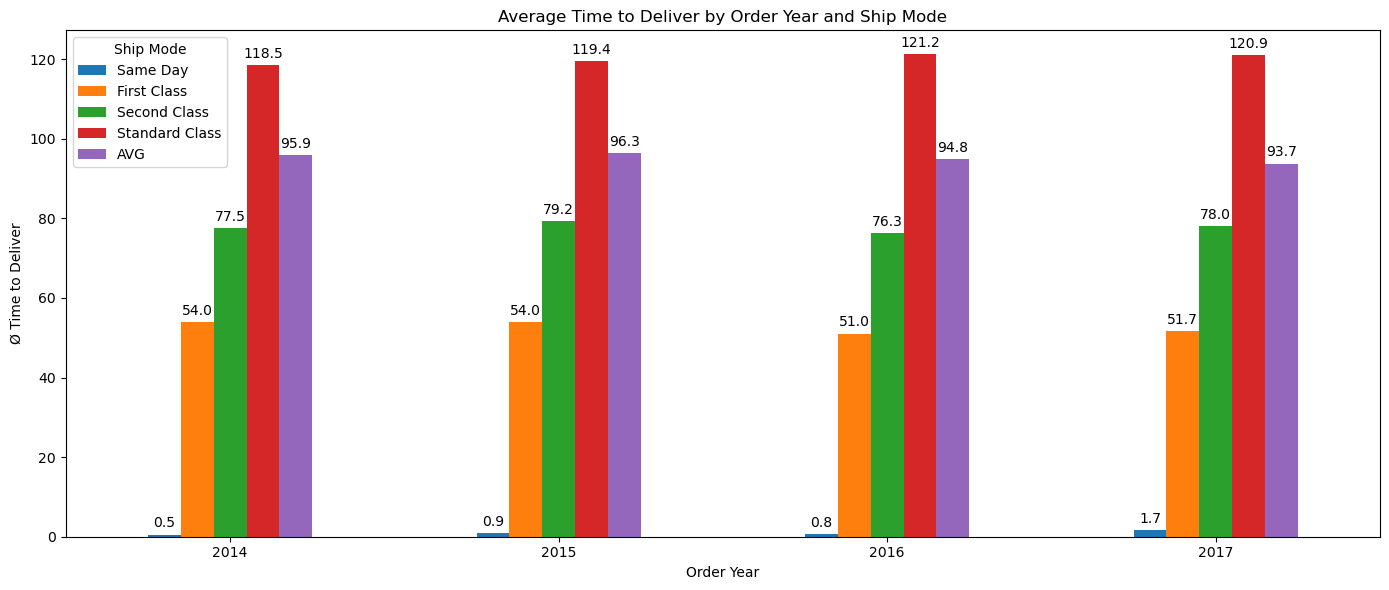

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# gewünschte Reihenfolge der Ship Modes
# -------------------------------------------------
order = [
    "Same Day",
    "First Class",
    "Second Class",
    "Standard Class"
]

# -------------------------------------------------
# 1) Häufigkeit der ship_mode NACH JAHR ausgeben
# -------------------------------------------------
print("Anzahl pro Jahr und Ship Mode:\n")

count_table = (
    df
    .groupby(["order_year", "ship_mode"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=order)
)

print(count_table)
print("\n" + "-"*40 + "\n")

# -------------------------------------------------
# 2) Mittelwert pro Jahr & ship_mode
# -------------------------------------------------
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["time_to_deliver"]
    .mean()
    .reset_index()
)

# -------------------------------------------------
# 3) Pivot + Reihenfolge
# -------------------------------------------------
pivot = (
    df_mean
    .pivot(index="order_year", columns="ship_mode", values="time_to_deliver")
    .reindex(columns=order)
)

# -------------------------------------------------
# 4) KORREKTER AVG:
#    über ALLE Bestellungen eines Jahres
# -------------------------------------------------
year_avg = (
    df
    .groupby("order_year")["time_to_deliver"]
    .mean()
)

pivot["AVG"] = year_avg

# -------------------------------------------------
# 5) Plot
# -------------------------------------------------
ax = pivot.plot(
    kind="bar",
    figsize=(14, 6)
)

ax.set_xlabel("Order Year")
ax.set_ylabel("Ø Time to Deliver")
ax.set_title("Average Time to Deliver by Order Year and Ship Mode")
ax.legend(title="Ship Mode")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# -------------------------------------------------
# 6) Werte über Balken schreiben
# -------------------------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f",
        padding=3
    )

plt.tight_layout()
plt.show()


Korrelation mit Profit:
profit         1.000000
sales          0.479064
quantity       0.066253
order_year     0.004670
ship_year      0.004531
order_month   -0.000502
ship_month    -0.000951
discount      -0.219487
Name: profit, dtype: float64
------------------------------


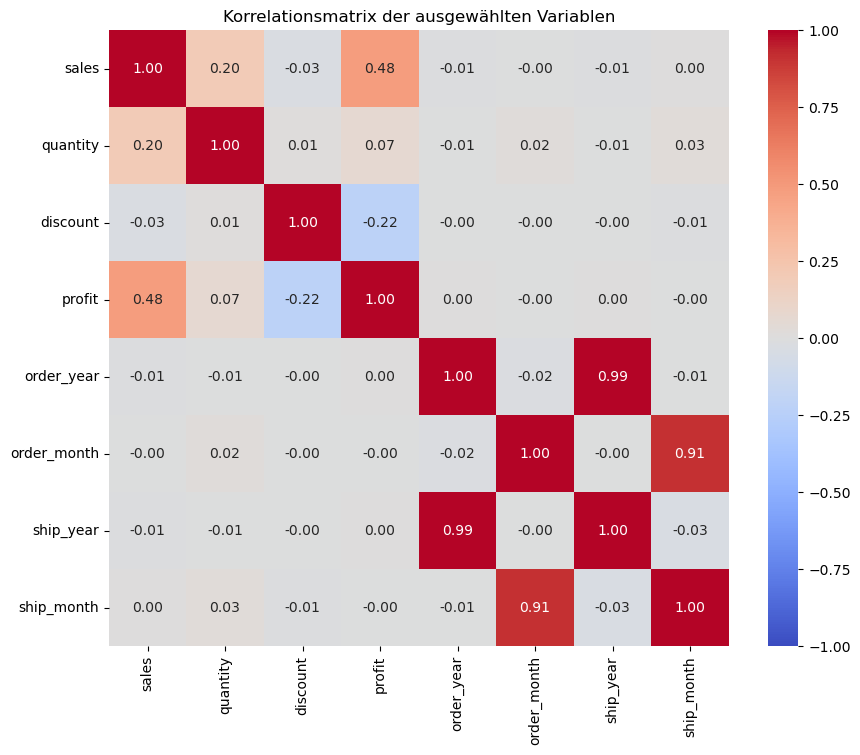

Alle signifikanten Korrelationen (Paare):
ship_year - order_year: 0.9941
order_year - ship_year: 0.9941
ship_month - order_month: 0.9119
order_month - ship_month: 0.9119
profit - sales: 0.4791
sales - profit: 0.4791
quantity - sales: 0.2008
sales - quantity: 0.2008
profit - discount: -0.2195
discount - profit: -0.2195


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Daten laden (index_col=0 behandelt die erste Index-Spalte korrekt)
df = pd.read_csv("cleaned_salesdata.csv", index_col=0)

# 2. Spalten umbenennen wie gewünscht
new_column_names = [
    "row_id", "order_id", "ship_mode", "customer_id", "customer_name",
    "segment", "country", "city", "state", "postal_code", "region",
    "product_id", "category", "sub_category", "product_name",
    "sales", "quantity", "discount", "profit",
    "order_year", "order_month", "order_day",
    "ship_year", "ship_month", "ship_day"
]

# Sicherstellen, dass die Anzahl der Spalten übereinstimmt
if len(df.columns) == len(new_column_names):
    df.columns = new_column_names
else:
    print(f"Achtung: Spaltenanzahl ({len(df.columns)}) passt nicht zur Liste ({len(new_column_names)}).")

# 3. Listen zur Steuerung der Korrelation
# Hier können Sie definieren, welche Variablen in den Zeilen und Spalten der Matrix erscheinen sollen.
# Aktuell sind alle sinnvollen numerischen Variablen enthalten.

numeric_params_1 = [
    "sales", "quantity", "discount", "profit", 
    "order_year", "order_month", "ship_year", "ship_month"
]

numeric_params_2 = [
    "sales", "quantity", "discount", "profit",
    "order_year", "order_month", "ship_year", "ship_month"
]

# 4. Berechnung der Korrelation
# Wir berechnen die Matrix nur für die ausgewählten Spalten
# Falls Sie nur "profit" gegen den Rest sehen wollen, können Sie numeric_params_2 auf ['profit'] setzen.
corr_matrix = df[numeric_params_1].corr()

# 5. Ausgabe der Korrelationen mit "profit" (falls in der Liste enthalten)
if "profit" in corr_matrix.columns:
    print("Korrelation mit Profit:")
    print(corr_matrix["profit"].sort_values(ascending=False))
    print("-" * 30)

# 6. Visualisierung als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix der ausgewählten Variablen")
plt.show()

# Zusatz: Filtern aller starken Korrelationen (> 0.1 oder < -0.1)
print("Alle signifikanten Korrelationen (Paare):")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
for (var1, var2), val in corr_pairs.items():
    if var1 != var2 and abs(val) > 0.1: # Filter für Relevanz
        # Um Duplikate (A-B und B-A) zu vermeiden, könnte man hier weiter filtern
        print(f"{var1} - {var2}: {val:.4f}")

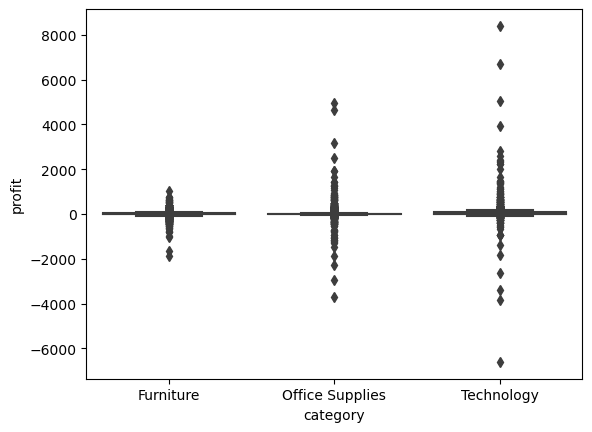

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Menge pro Kategorie
sns.boxplot(x='category', y='profit', data=df)
plt.show()


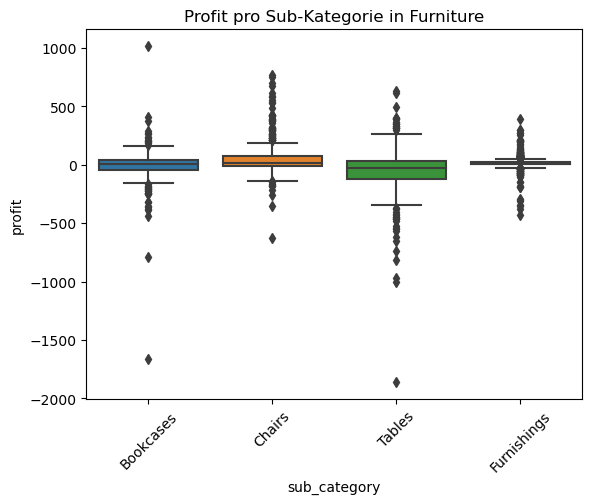

In [39]:
sns.boxplot(x='sub_category', y='profit', data=df[df['category']=='Furniture'])
plt.title("Profit pro Sub-Kategorie in Furniture")
plt.xticks(rotation=45)  # Labels lesbar machen
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# 2. Spalten bereinigen (wie zuvor definiert)
new_column_names = [
    "row_id", "order_id", "ship_mode", "customer_id", "customer_name",
    "segment", "country", "city", "state", "postal_code", "region",
    "product_id", "category", "sub_category", "product_name",
    "sales", "quantity", "discount", "profit",
    "order_year", "order_month", "order_day",
    "ship_year", "ship_month", "ship_day"
]

# Prüfen ob Index-Spalte existiert und entfernen/umbenennen
if len(df.columns) == 26: 
    df = df.iloc[:, 1:] 
df.columns = new_column_names

df = df[df['ship_mode'].isin(['First Class','Second Class','Standard Class'])]
# 3. Features & Target definieren
# Diese Features basieren auf unserer vorherigen Analyse
features = [
    'sales', 'quantity', 'discount',      # Numerisch
    'category', 'sub_category', 'region', 'segment' # Kategorisch
]
target = 'profit'

X = df[features]
y = df[target]

# One-Hot Encoding für kategorische Variablen
X_encoded = pd.get_dummies(X, columns=['category', 'sub_category', 'region', 'segment'], drop_first=True)

# 4. Modelle definieren (Ihre Parameter)
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
    ),
}

# 5. Cross Validation durchführen
print(f"{'Model':<20} | {'R2 Score (Mean)':<15} | {'MAE (Mean USD)':<15}")
print("-" * 60)

for name, model in models.items():
    # R2 Score: Wie gut passt das Modell (1.0 ist perfekt)
    cv_r2 = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')
    
    # MAE (Mean Absolute Error): Durchschnittlicher Fehler in USD
    # Wir nutzen 'neg_mean_absolute_error', da sklearn Scores maximieren will (daher sind Fehler negativ)
    cv_mae = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"{name:<20} | {cv_r2.mean():<15.4f} | {-cv_mae.mean():<15.2f}")

Model                | R2 Score (Mean) | MAE (Mean USD) 
------------------------------------------------------------
LinearRegression     | 0.2143          | 59.94          
RandomForest         | 0.6332          | 19.33          
GradientBoosting     | 0.7037          | 27.43          


In [9]:
print(f"Years in which orders were placed: {df['order_year'].unique()}.")
print(f"Years in which deliveries were made: {df['ship_year'].unique()}.")

Years in which orders were placed: [2016 2015 2014 2017].
Years in which deliveries were made: [2016 2015 2014 2017 2018].


In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Beispiel: Kategorie ↔ Region
table = pd.crosstab(df['product_name'], df['region'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-Wert: {p}")


Chi2: 5558.870251083685, p-Wert: 0.4526590809634631


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Menge pro Kategorie
sns.boxplot(x='category', y='region', data=df)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
df = df.drop(columns=['ship_year', 'ship_month', 'ship_day'])
df.columns

Index(['row_id', 'order_id', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'order_date', 'order_weekday', 'order_week_of_year',
       'order_is_weekend'],
      dtype='object')

: 

# Data 